In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib as mpl
%matplotlib inline

In [41]:
!pip install -q sociophysicsDataHandler 
from sociophysicsDataHandler import SociophysicsDataHandler
dh = SociophysicsDataHandler()
p = """guest
YDPGL-XREXC-QGMZS-UAKES"""
c = """text_file = open("auth.txt", "w+");text_file.write(p);text_file.close()""" 
exec(c)

In [55]:
def generate_matrix(p, v, f, n):
    
    H = -f(p) + v    
    M = 1/(n+n*np.exp(H - H.T))
    np.fill_diagonal(M, (1+1/(2*n))-np.sum(M, axis=0))
    return M

frus = {0.0: 0.5766171923801149,
 0.1: 0.19550412509806275,
 0.2: -1.1815914946426367,
 0.3: -2.8028608222242744,
 0.4: -4.744488124808694,
 0.5: -6.969278518176659,
 0.6: -9.398595373397916,
 0.7: -11.520536554268228,
 0.8: -14.274399558735857,
 0.9: -16.616473854584388,
 1.0: -15.210846187293631}
frus.values()

f = interp1d(np.array(list(frus.keys()))*20, list(frus.values()))

In [56]:
n = 16

v = np.matrix([[13.38599487],
       [13.68961918],
       [14.96567007],
       [14.06993678],
       [14.22645622],
       [16.41348014],
       [18.29996812],
       [17.0022138 ],
       [19.65166021],
       [20.14533368],
       [20.3595018 ],
       [ 8.17278563],
       [19.28149228],
       [20.59522845],
       [23.15245783],
       [24.52621625]])

p = np.matrix(np.ones((16, 1))) * 20/16

for _ in range(1000):
    p = generate_matrix(p, v, f, n) * p

df_dens = pd.DataFrame(index=df_geometry.index[(df_geometry.index != '1, 2') & (df_geometry.index != '1, 3')], data={'dens':np.array(p.flatten())[0], 'vex':np.array(v.flatten())[0]})
    
#generate_matrix(p, v, f, n)

did not work
did not work
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/background_images/EHV.Perron2.1_multisensor.png
background fetched. Accessible as <this-object>.bg


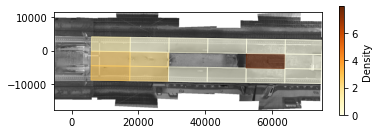

In [57]:
df_geometry = pd.read_csv('Geometry ehv all multibin.csv').set_index('Unnamed: 0')

cmap = mpl.cm.get_cmap('YlOrBr')

for i in df_geometry.index:

    x = [list(eval(a))[0] for a in df_geometry.loc[i].to_list()]
    y = [list(eval(a))[1] for a in df_geometry.loc[i].to_list()]

    try:
        plt.fill(x, y, color=cmap(df_dens['dens'][i]/df_dens['dens'].max()), alpha=0.6)
    except:
        print('did not work')
    
dh.fetch_background_image_from_path('ehv/background_images/EHV.Perron2.1_multisensor.png')
image = dh.bg

plt.imshow(image, extent=[-5134, 75135, -17731, 11645])

cax = mpl.cm.ScalarMappable(cmap=cmap)
cax.set_array(np.array([0, 1])*df_dens['dens'].max())
plt.colorbar(cax, shrink=0.5, label='Density')
plt.savefig('heatmap density with change.png')

In [40]:
cmap(-p[i,0]/np.max(p)+1)

TypeError: string indices must be integers

<AxesSubplot:xlabel='vex', ylabel='dens'>

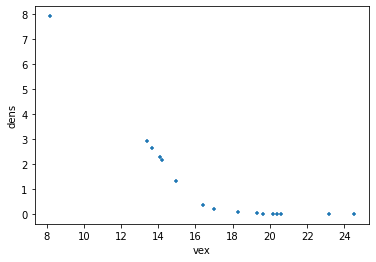

In [29]:
df_dens.plot(kind='scatter', x='vex', y='dens', marker='+')

In [93]:
df_geometry.index

Index(['0, 0', '1, 0', '2, 0', '0, 1', '1, 1', '2, 1', '0, 2', '1, 2', '2, 2',
       '0, 3', '1, 3', '2, 3', '0, 4', '1, 4', '2, 4', '0, 5', '1, 5', '2, 5'],
      dtype='object', name='Unnamed: 0')